<a href="https://colab.research.google.com/github/manjotmb20/Transfer-Learning/blob/master/customobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib.pyplot as plt
import cv2
from matplotlib.widgets import RectangleSelector

In [0]:
img=None
tl_list=[]
br_list=[]
object_list=[]

In [0]:
t=None

In [0]:
image_folder='images'
savedir='annotations'
obj='fidget_spinner'

In [0]:
def line_select_callback(clk,rls):
  global tl_list
  global br_list
  global object_list
  tl_list.append((int(clk.xdata), int(clk.ydata)))
  br_list.append((int(rls.xdata), int(rls.ydata)))
  object_list.append(obj)
  

In [0]:
def toggle_selector(event):
    toggle_selector.RS.set_active(True)


In [0]:
def onkeypress(event):
    global object_list
    global tl_list
    global br_list
    global img
    if event.key == 'q':
        print(object_list)
        write_xml(image_folder, img, object_list, tl_list, br_list, savedir)
        tl_list = []
        br_list = []
        object_list = []
        img = None
        plt.close()

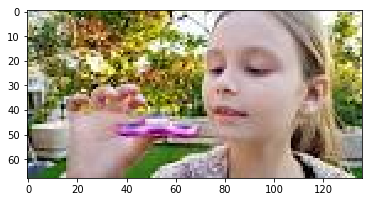

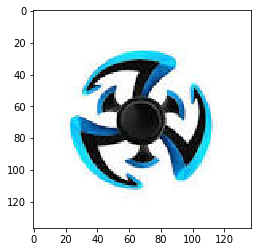

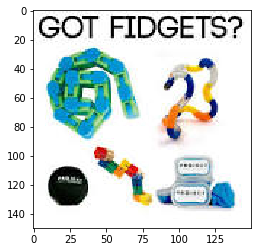

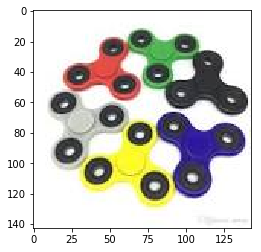

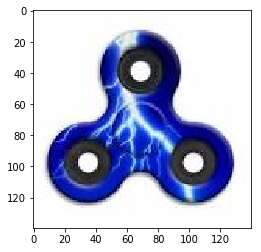

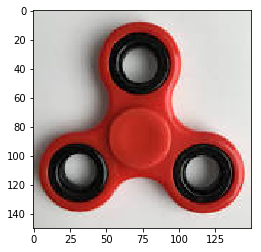

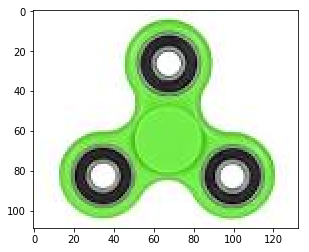

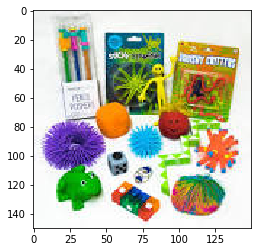

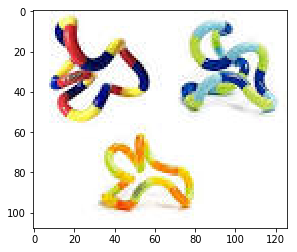

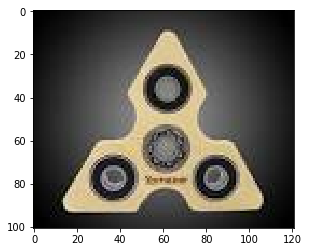

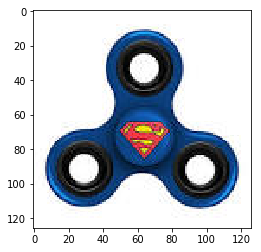

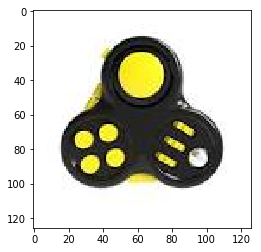

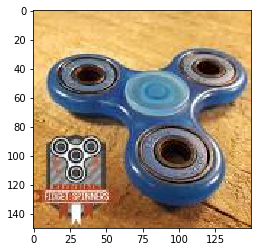

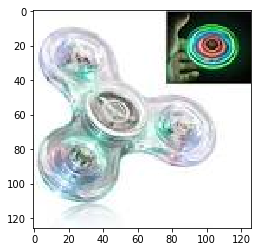

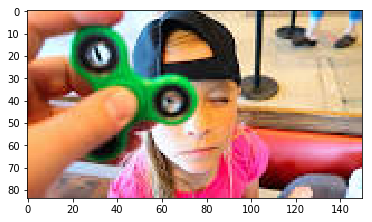

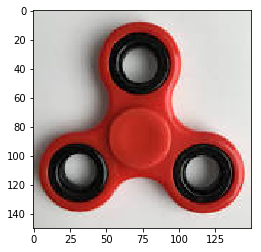

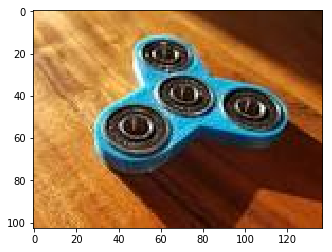

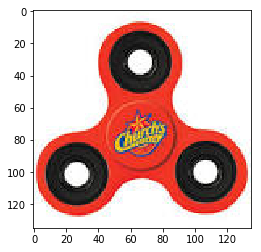

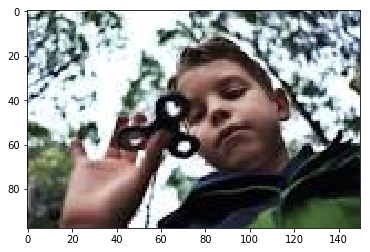

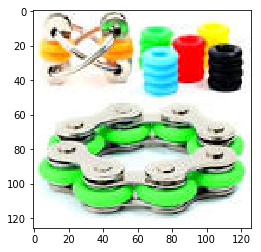

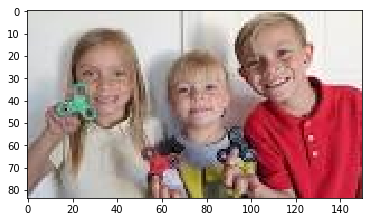

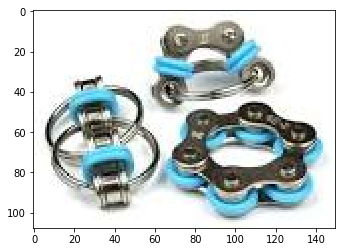

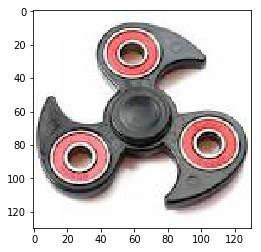

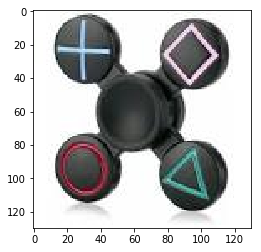

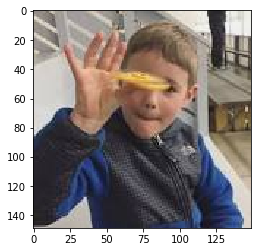

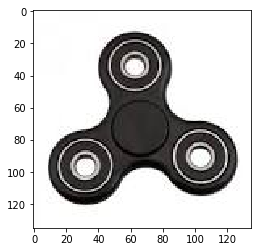

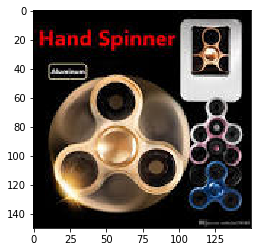

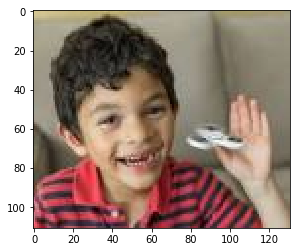

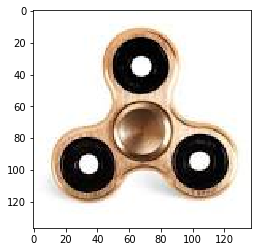

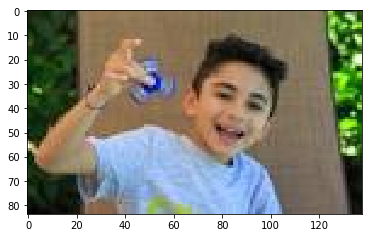

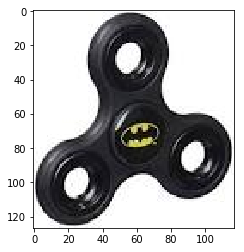

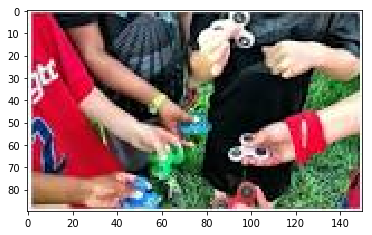

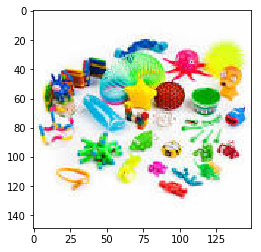

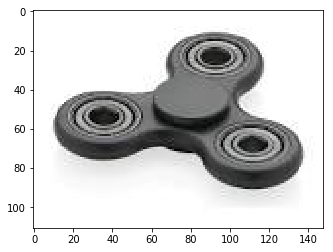

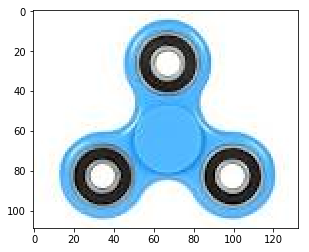

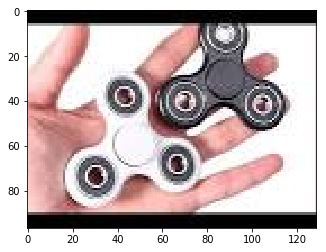

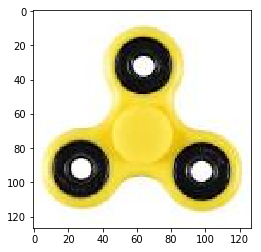

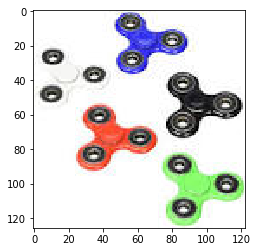

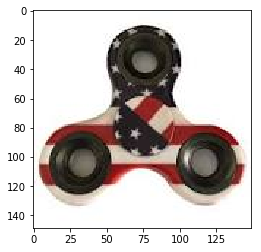

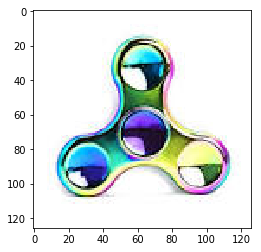

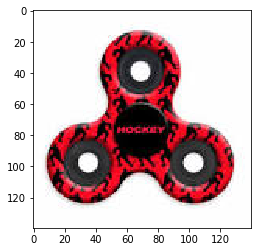

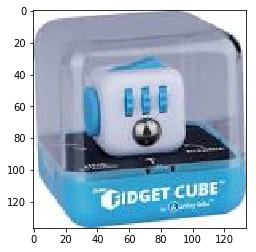

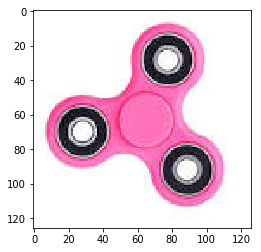

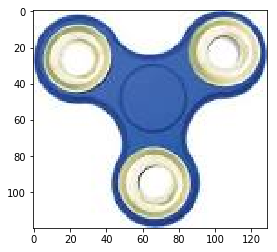

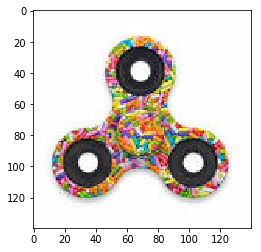

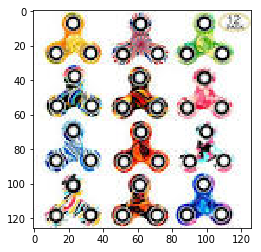

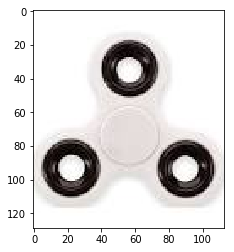

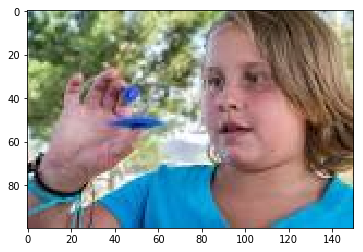

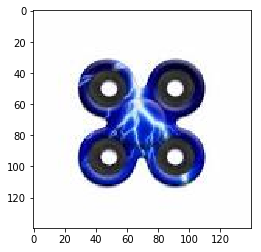

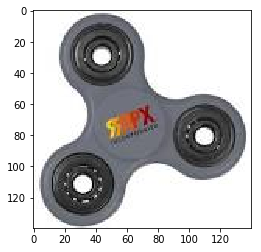

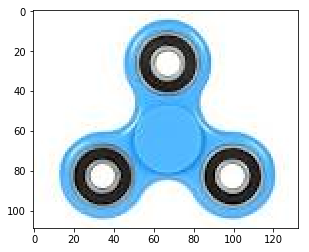

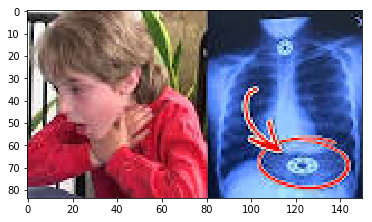

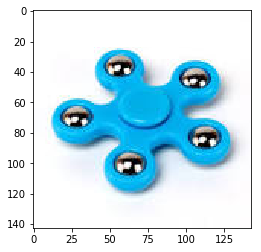

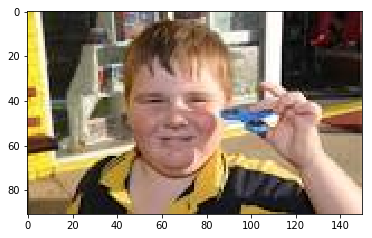

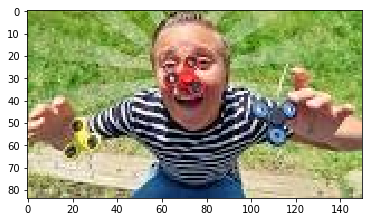

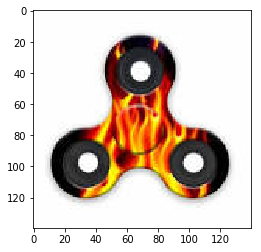

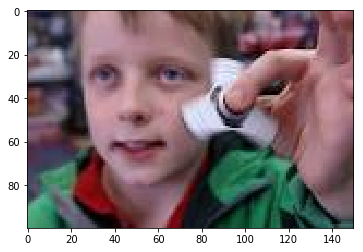

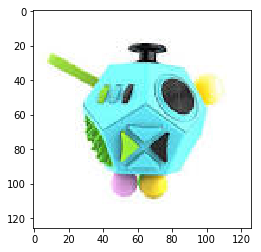

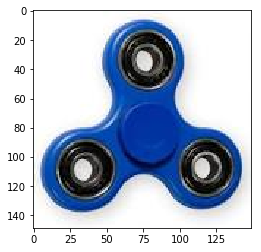

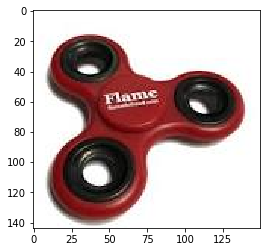

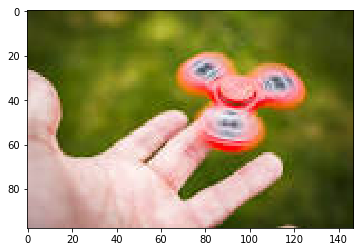

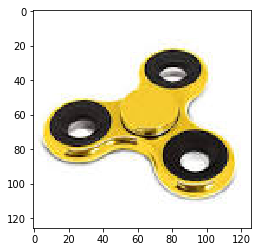

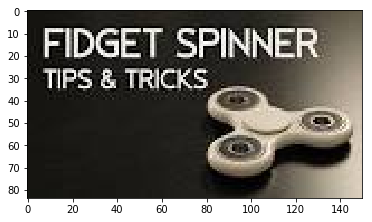

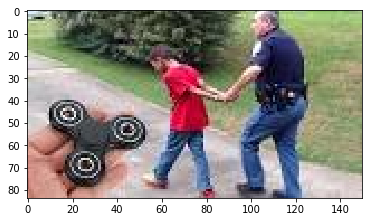

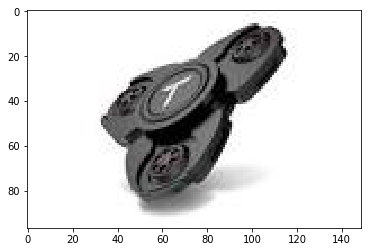

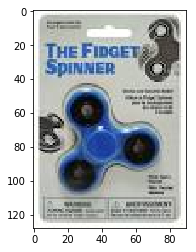

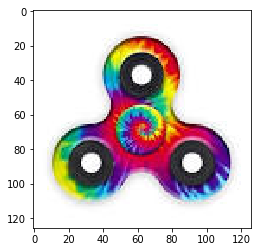

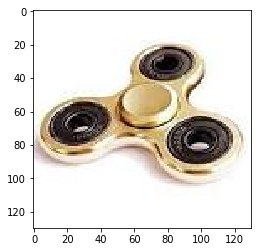

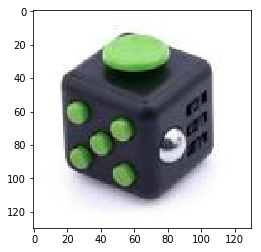

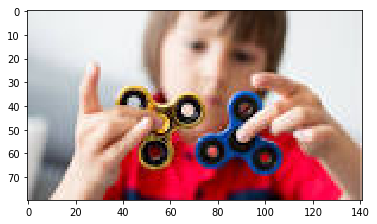

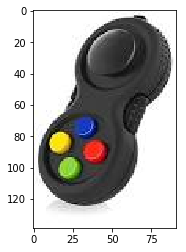

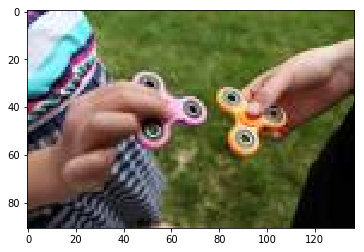

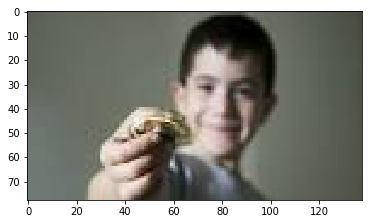

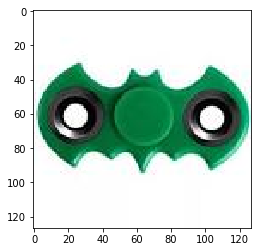

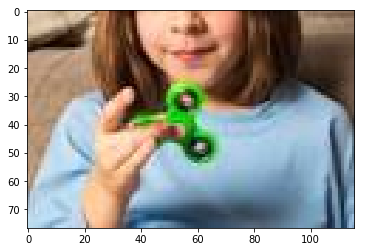

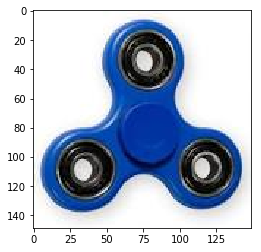

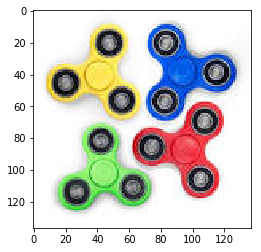

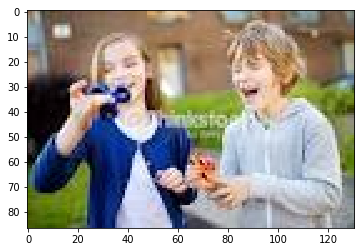

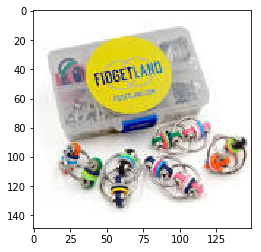

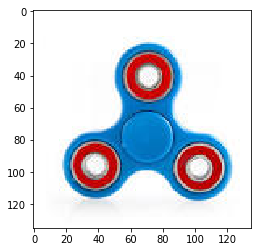

In [32]:
if __name__=='__main__':
  for n,image_file in enumerate(os.scandir(image_folder)):
    img=image_file
    fig,ax=plt.subplots(1)
    image=cv2.imread(image_file.path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    toggle_selector.RS = RectangleSelector(
            ax, line_select_callback,
            drawtype='box', useblit=True,
            button=[1], minspanx=5, minspany=5,
            spancoords='pixels', interactive=True
        )
    bbox = plt.connect('key_press_event', toggle_selector)
    key = plt.connect('key_press_event', onkeypress)
    plt.show()
    

In [33]:
br_list

[]

In [0]:
for n,image_file in enumerate(os.scandir(image_folder)):
  img=image_file
  
image=cv2.imread(img.path)
fig,ax=plt.subplots(1)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

ax.imshow(image)
plt.connect('button_press_event',line_select_callback)
plt.show()